In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline

import os
os.chdir('/home/gui/Downloads/udemy_deep_learning AZ/P16-Recurrent-Neural-Networks/Recurrent_Neural_Networks')
os.getcwd()

'/home/gui/Downloads/udemy_deep_learning AZ/P16-Recurrent-Neural-Networks/Recurrent_Neural_Networks'

In [3]:
X_test = pd.read_csv('Google_Stock_Price_Test.csv')
X_train = pd.read_csv('Google_Stock_Price_Train.csv')

print(X_train.head())
print(X_train.shape, X_test.shape)

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
(1258, 6) (20, 6)


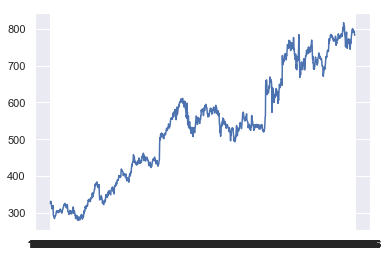

In [35]:
fig, ax = plt.subplots()
ax.plot(X_train['Date'],X_train['Open'])

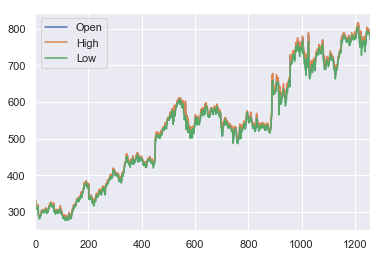

In [34]:
X_train.plot()

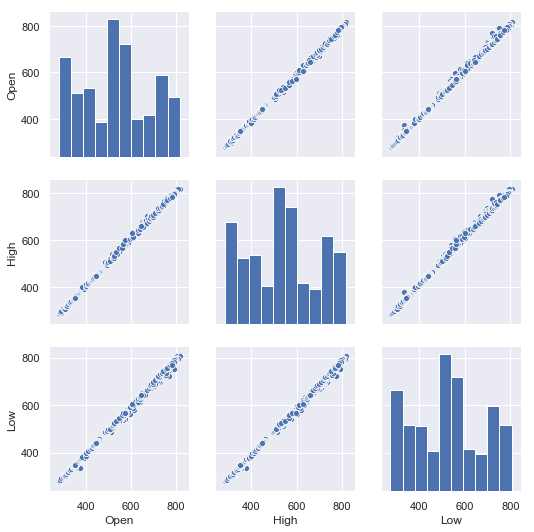

In [55]:
seaborn.pairplot(X_train)

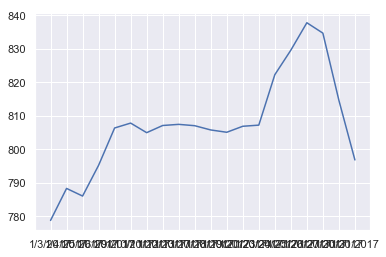

In [37]:
plt.plot(X_test['Date'],X_test['Open'])

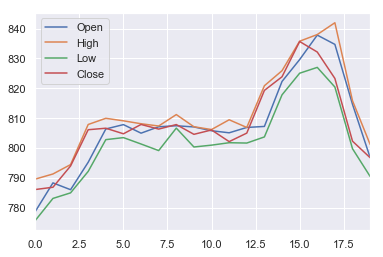

In [38]:
X_test.plot()

In [56]:
x_train = X_train.iloc[:,1].values
type(x_train), x_train.shape

(numpy.ndarray, (1258,))

In [57]:
x_train = X_train.iloc[:,1:2].values # We need this shape: (len,1)
type(x_train), x_train.shape

(numpy.ndarray, (1258, 1))

In [60]:
# Another way
x_test = X_test['Open'].values[:,np.newaxis]
type(x_test), x_test.shape

(numpy.ndarray, (20, 1))

In [62]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train[:10]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259]])

In [64]:
X_tr = []
y_tr = []

for i in range(60,1258):
    X_tr.append(x_train[i-60:i,0])
    y_tr.append(x_train[i,0])
    
X_tr = np.array(X_tr)
y_tr = np.array(y_tr)
type(X_tr), X_tr.shape, type(y_tr), y_tr.shape

(numpy.ndarray, (1198, 60), numpy.ndarray, (1198,))

In [66]:
# Indicators dimension. Look at keras documentation, RNN input shapes

X_tr = np.reshape(X_tr, (X_tr.shape[0],X_tr.shape[1],1))
X_tr.shape

(1198, 60, 1)

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [69]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_tr.shape[1],1)))
model.add(Dropout(rate = 0.2))

In [70]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units = 50))
model.add(Dropout(rate = 0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [71]:
model.fit(X_tr,y_tr,batch_size=32,epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0579
Epoch 2/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0044
Epoch 6/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0042
Epoch 12/100
1

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 94/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 95/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 97/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0018
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0013


In [117]:
x_total = pd.concat((X_train['Open'],X_test['Open']),axis=0)
type(x_total), x_total.shape

(pandas.core.series.Series, (1278,))

In [118]:
x_test = x_total.iloc[len(x_total)-len(X_test['Open'])-60:].values[:,np.newaxis]
x_test.shape

(80, 1)

In [119]:
x_test = sc.transform(x_test)

In [120]:
X_te = []
y_te = []

for i in range(60,80):
    X_te.append(x_test[i-60:i,0])
    y_te.append(x_test[i,0])
    
X_te = np.array(X_te)
y_te = np.array(y_te)[:,np.newaxis]
type(X_te), X_te.shape, type(y_te), y_te.shape

(numpy.ndarray, (20, 60), numpy.ndarray, (20, 1))

In [121]:
X_te = np.reshape(X_te, (X_te.shape[0],X_te.shape[1],1))
X_te.shape

(20, 60, 1)

In [122]:
y_pred = model.predict(X_te)
y_pred.shape

(20, 1)

In [123]:
y_te = sc.inverse_transform(y_te)
y_pred = sc.inverse_transform(y_pred)

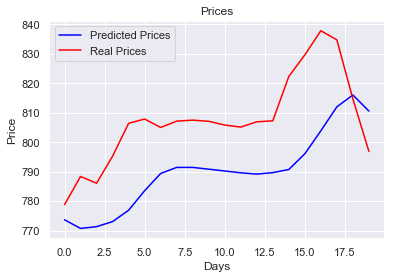

In [126]:
plt.plot(y_pred,color='blue',label='Predicted Prices')
plt.plot(y_te,color='red',label='Real Prices')
plt.title('Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [127]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_te, y_pred))
rmse

20.749095908005014

In [128]:
rmse/800

0.025936369885006267